In [1]:
import numpy as np
import seaborn as sns
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [46]:
def createGraph(df):
    G = nx.DiGraph() # Using a directed graph as told in the question
    countries = df['name'].tolist()
    G.add_nodes_from(countries)
    # Add edges based on the atlas condition
    for country1 in countries:
        for country2 in countries:
            if country1 != country2 and country1[-1].lower() == country2[0].lower():
                G.add_edge(country1, country2)
    return G

In [53]:
def plotGraph(G):
    degrees = dict(G.degree())
    node_colors = [degrees[node] for node in G.nodes()]
    
    # Normalize the node colors for colormap
    norm = mcolors.Normalize(vmin=min(node_colors), vmax=max(node_colors))
    cmap = cm.autumn
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(30, 30))
    pos = nx.kamada_kawai_layout(G)
    
    # Draw nodes and edges with color mapping
    nodes = nx.draw_networkx_nodes(
        G, pos, ax=ax, node_size=50, node_color=node_colors, cmap=cmap
    )
    nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.3, edge_color='gray')
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=5, font_color='black', font_weight='bold')
    
    # Create a ScalarMappable and add a colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, label='Degree')
    
    # Show the plot
    plt.axis('off') # I dont want x-axis and y-axis to be present
    plt.savefig(f"{graph_name}.png",dpi=300)
    plt.show()

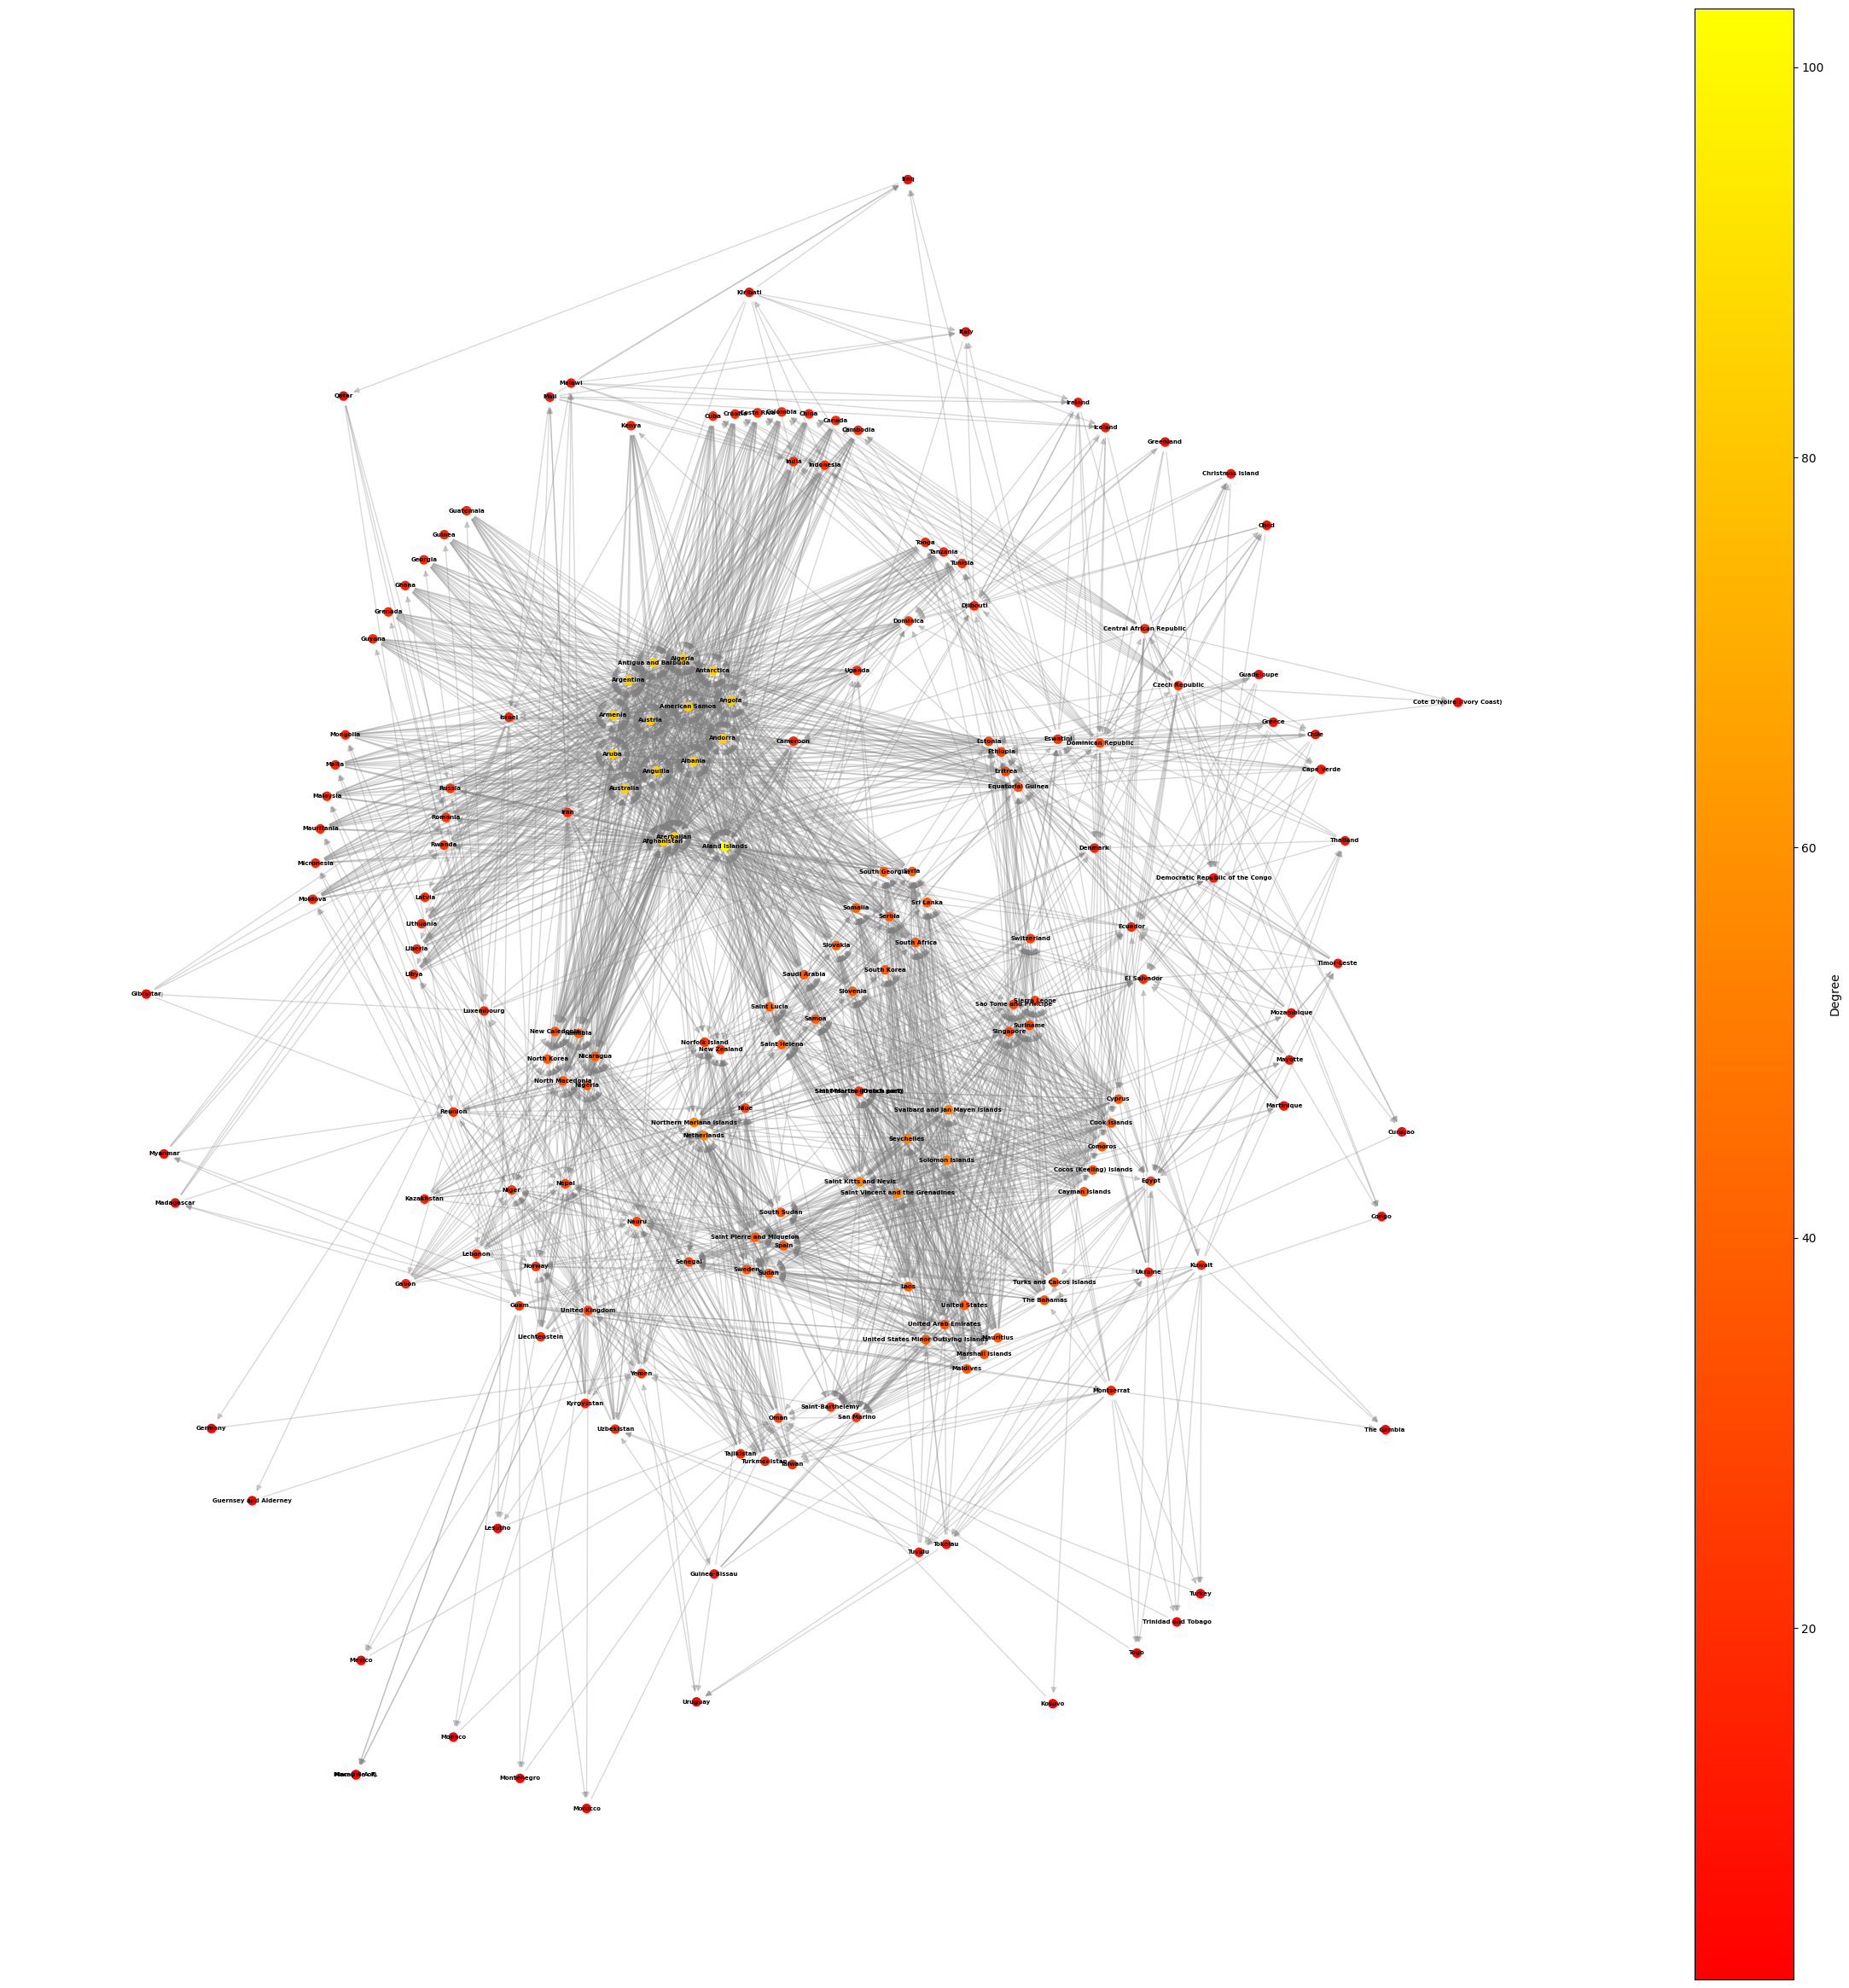

In [40]:
df = pd.read_csv('CSV/Used/countries.csv', usecols=['name'])
createGraph(G)
plotGraph(G)

In [41]:
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Sort nodes by in-degree in descending order
sorted_by_in_degree = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)

# Calculate the maximum width needed for the node column based on the longest node name
max_node_width = max(len(node) for node in in_degrees.keys())

# Define the header with dynamically calculated widths
header = f"{'Node':<{max_node_width}} | {'In-Degree':<10} | {'Out-Degree':<10}"
separator = '-' * len(header)

# Print the header
print(header)
print(separator)

# Print each row with aligned columns using the calculated width
for node, in_degree in sorted_by_in_degree:
    out_degree = out_degrees[node]
    print(f"{node:<{max_node_width}} | {in_degree:<10} | {out_degree:<10}")


Node                                 | In-Degree  | Out-Degree
--------------------------------------------------------------
Afghanistan                          | 70         | 15        
Aland Islands                        | 70         | 33        
Azerbaijan                           | 70         | 15        
Albania                              | 69         | 15        
Algeria                              | 69         | 15        
American Samoa                       | 69         | 15        
Andorra                              | 69         | 15        
Angola                               | 69         | 15        
Anguilla                             | 69         | 15        
Antarctica                           | 69         | 15        
Antigua and Barbuda                  | 69         | 15        
Argentina                            | 69         | 15        
Armenia                              | 69         | 15        
Aruba                                | 69         | 15 

We notice that indegree 0 countries are irrelevant from the perspective of the game, so we remove them

In [42]:
nodes_to_remove = [node for node, indeg in G.in_degree() if indeg == 0]
G.remove_nodes_from(nodes_to_remove)

The idea is that we need to find countries such that their outdegree is 0. If we find this then we can backtrack paths to reach the starting node  
This way we can find a way to trap our opponent in the game

In [43]:
# Assuming G is your graph object and you have already imported the necessary libraries

in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Sort nodes by out-degree in descending order
sorted_by_out_degree = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)

# Calculate the maximum width needed for the node column based on the longest node name
max_node_width = max(len(node) for node in out_degrees.keys())

# Define the header with dynamically calculated widths
header = f"{'Node':<{max_node_width}} | {'In-Degree':<10} | {'Out-Degree':<10}"
separator = '-' * len(header)

# Print the header
print(header)
print(separator)

# Print each row with aligned columns using the calculated width
for node, out_degree in sorted_by_out_degree:
    in_degree = in_degrees[node]
    print(f"{node:<{max_node_width}} | {in_degree:<10} | {out_degree:<10}")


Node                                 | In-Degree  | Out-Degree
--------------------------------------------------------------
Aland Islands                        | 70         | 33        
Cayman Islands                       | 3          | 33        
Cocos (Keeling) Islands              | 3          | 33        
Comoros                              | 3          | 33        
Cook Islands                         | 3          | 33        
Cyprus                               | 3          | 33        
Laos                                 | 3          | 33        
Maldives                             | 2          | 33        
Marshall Islands                     | 2          | 33        
Mauritius                            | 2          | 33        
Netherlands                          | 21         | 33        
Northern Mariana Islands             | 21         | 33        
The Bahamas                          | 3          | 33        
Turks and Caicos Islands             | 3          | 33 

In [47]:
df2 = pd.read_csv("CSV/Used/cities.csv")
G2= createGraph(df2)

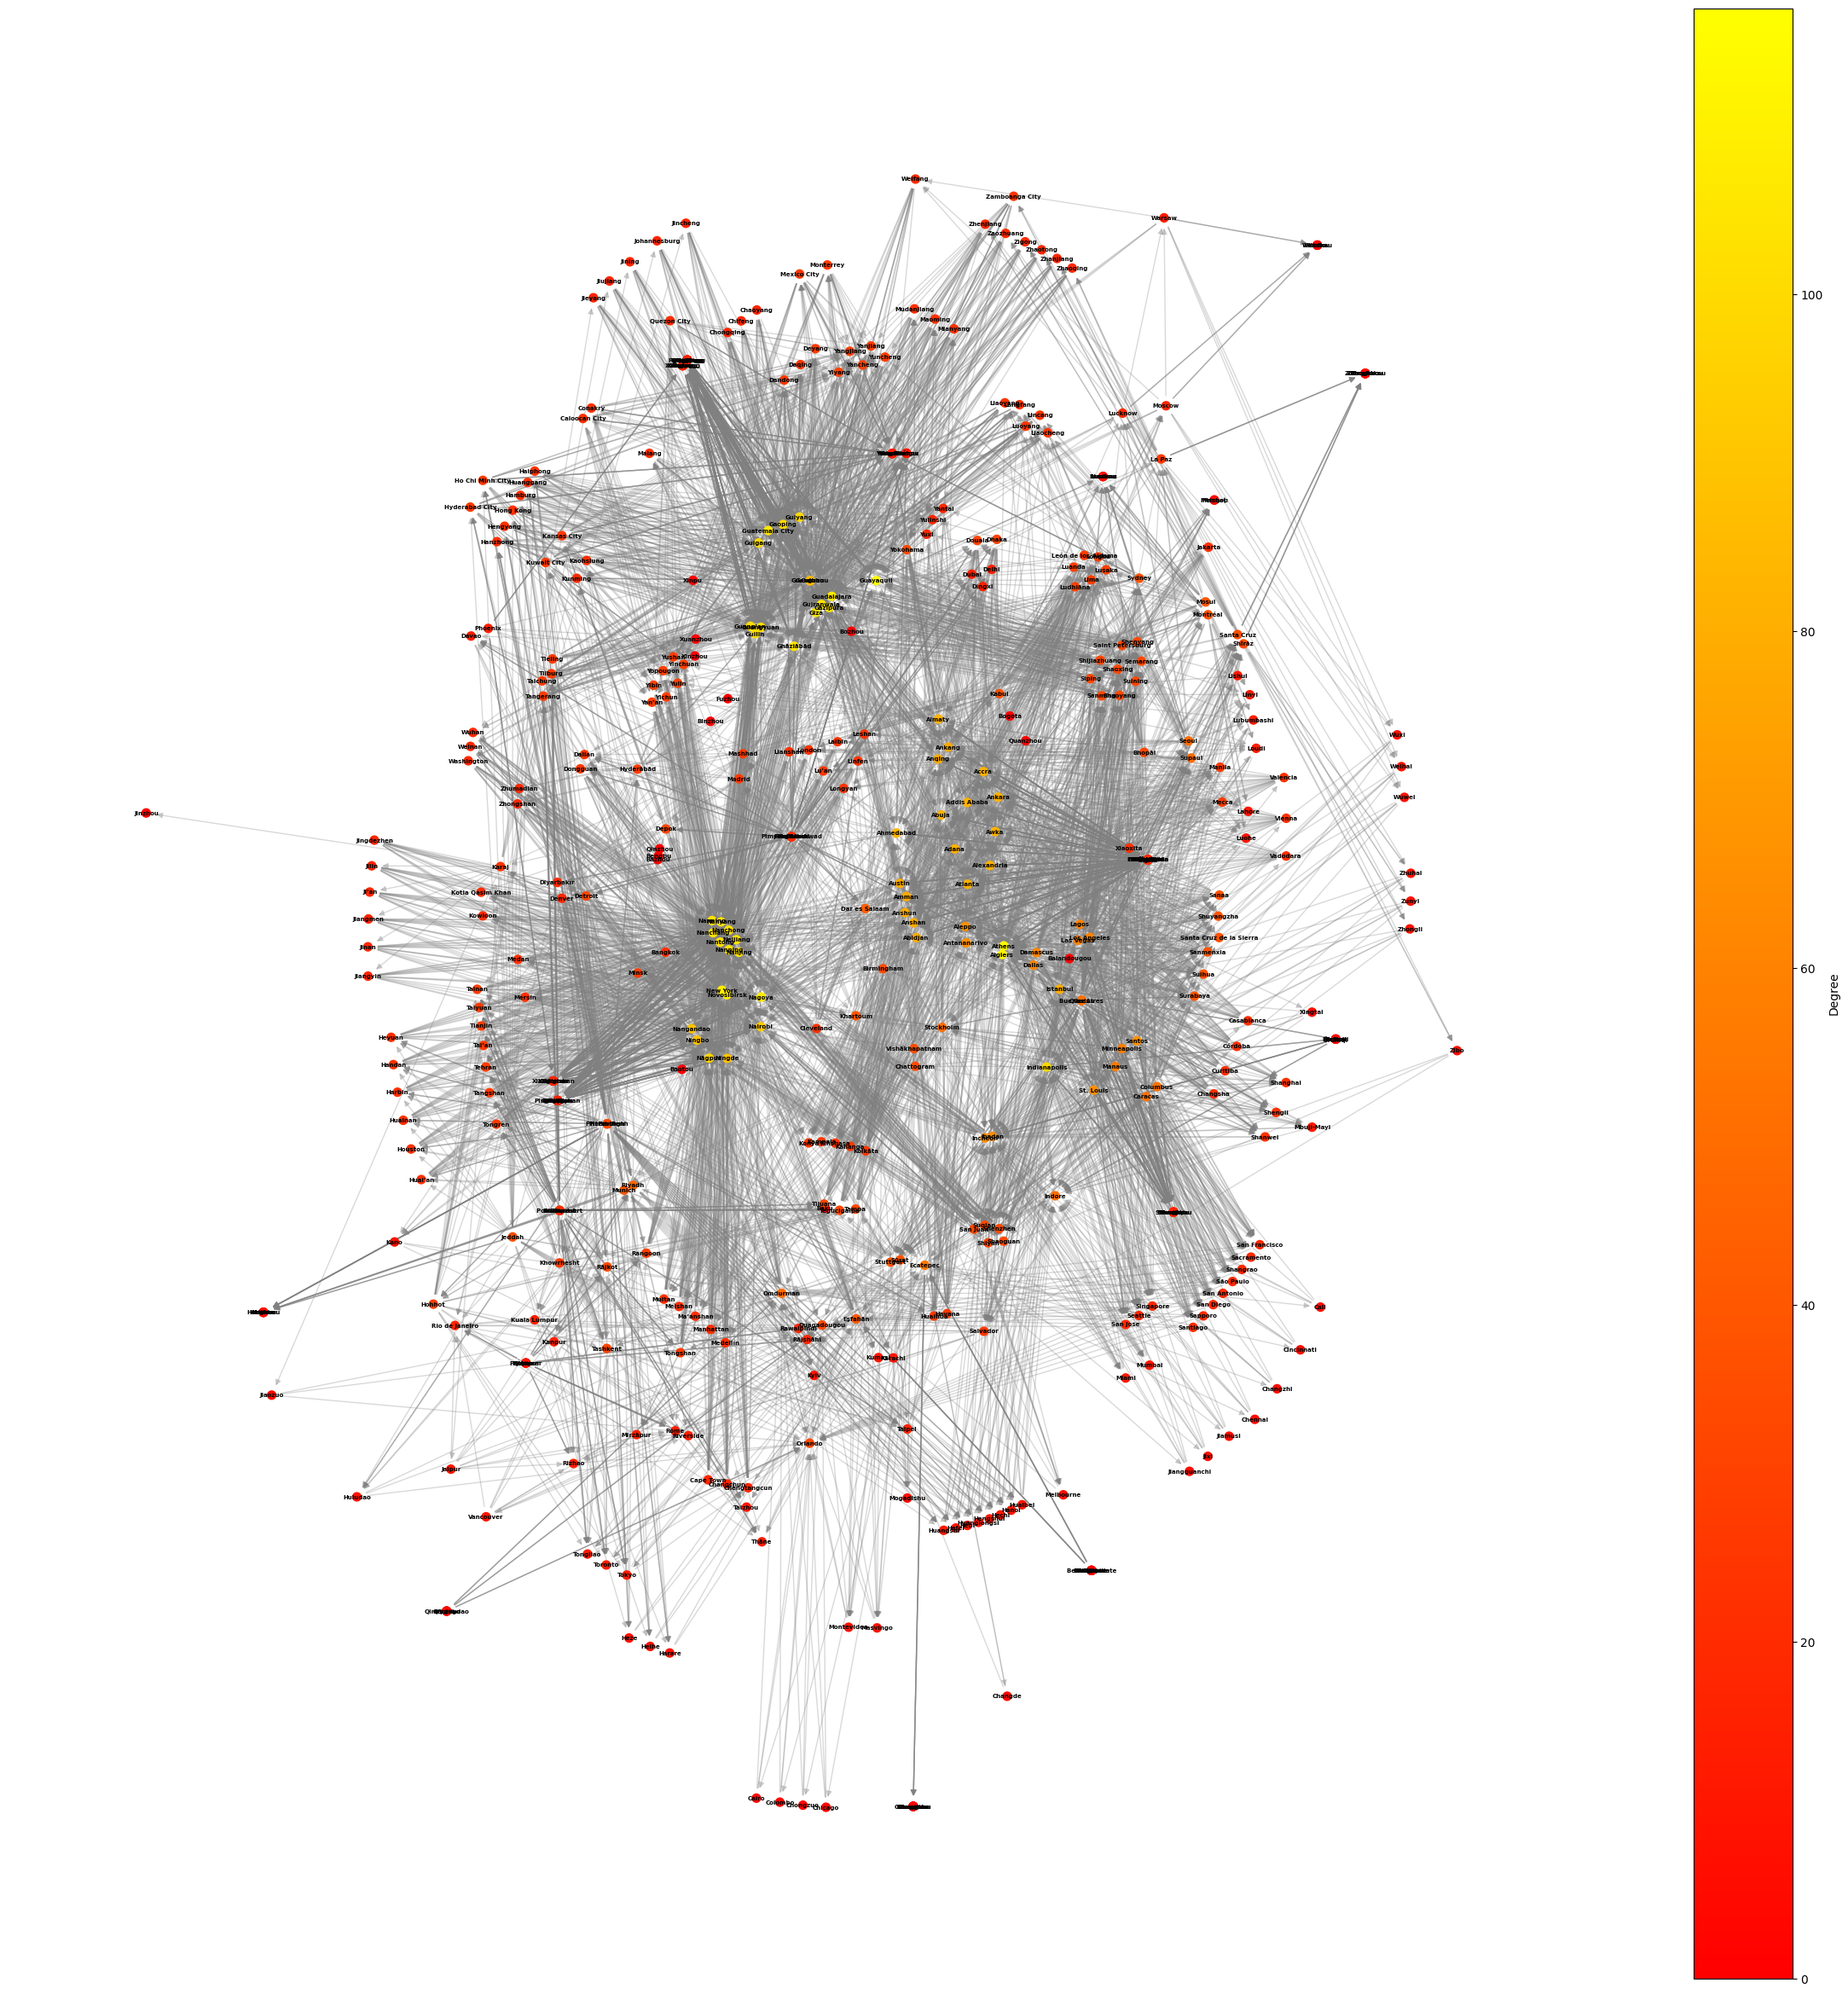

In [48]:
plotGraph(G2)

In [51]:
df3 = pd.read_csv("CSV/Used/db3.csv")
G3 = createGraph(df3)

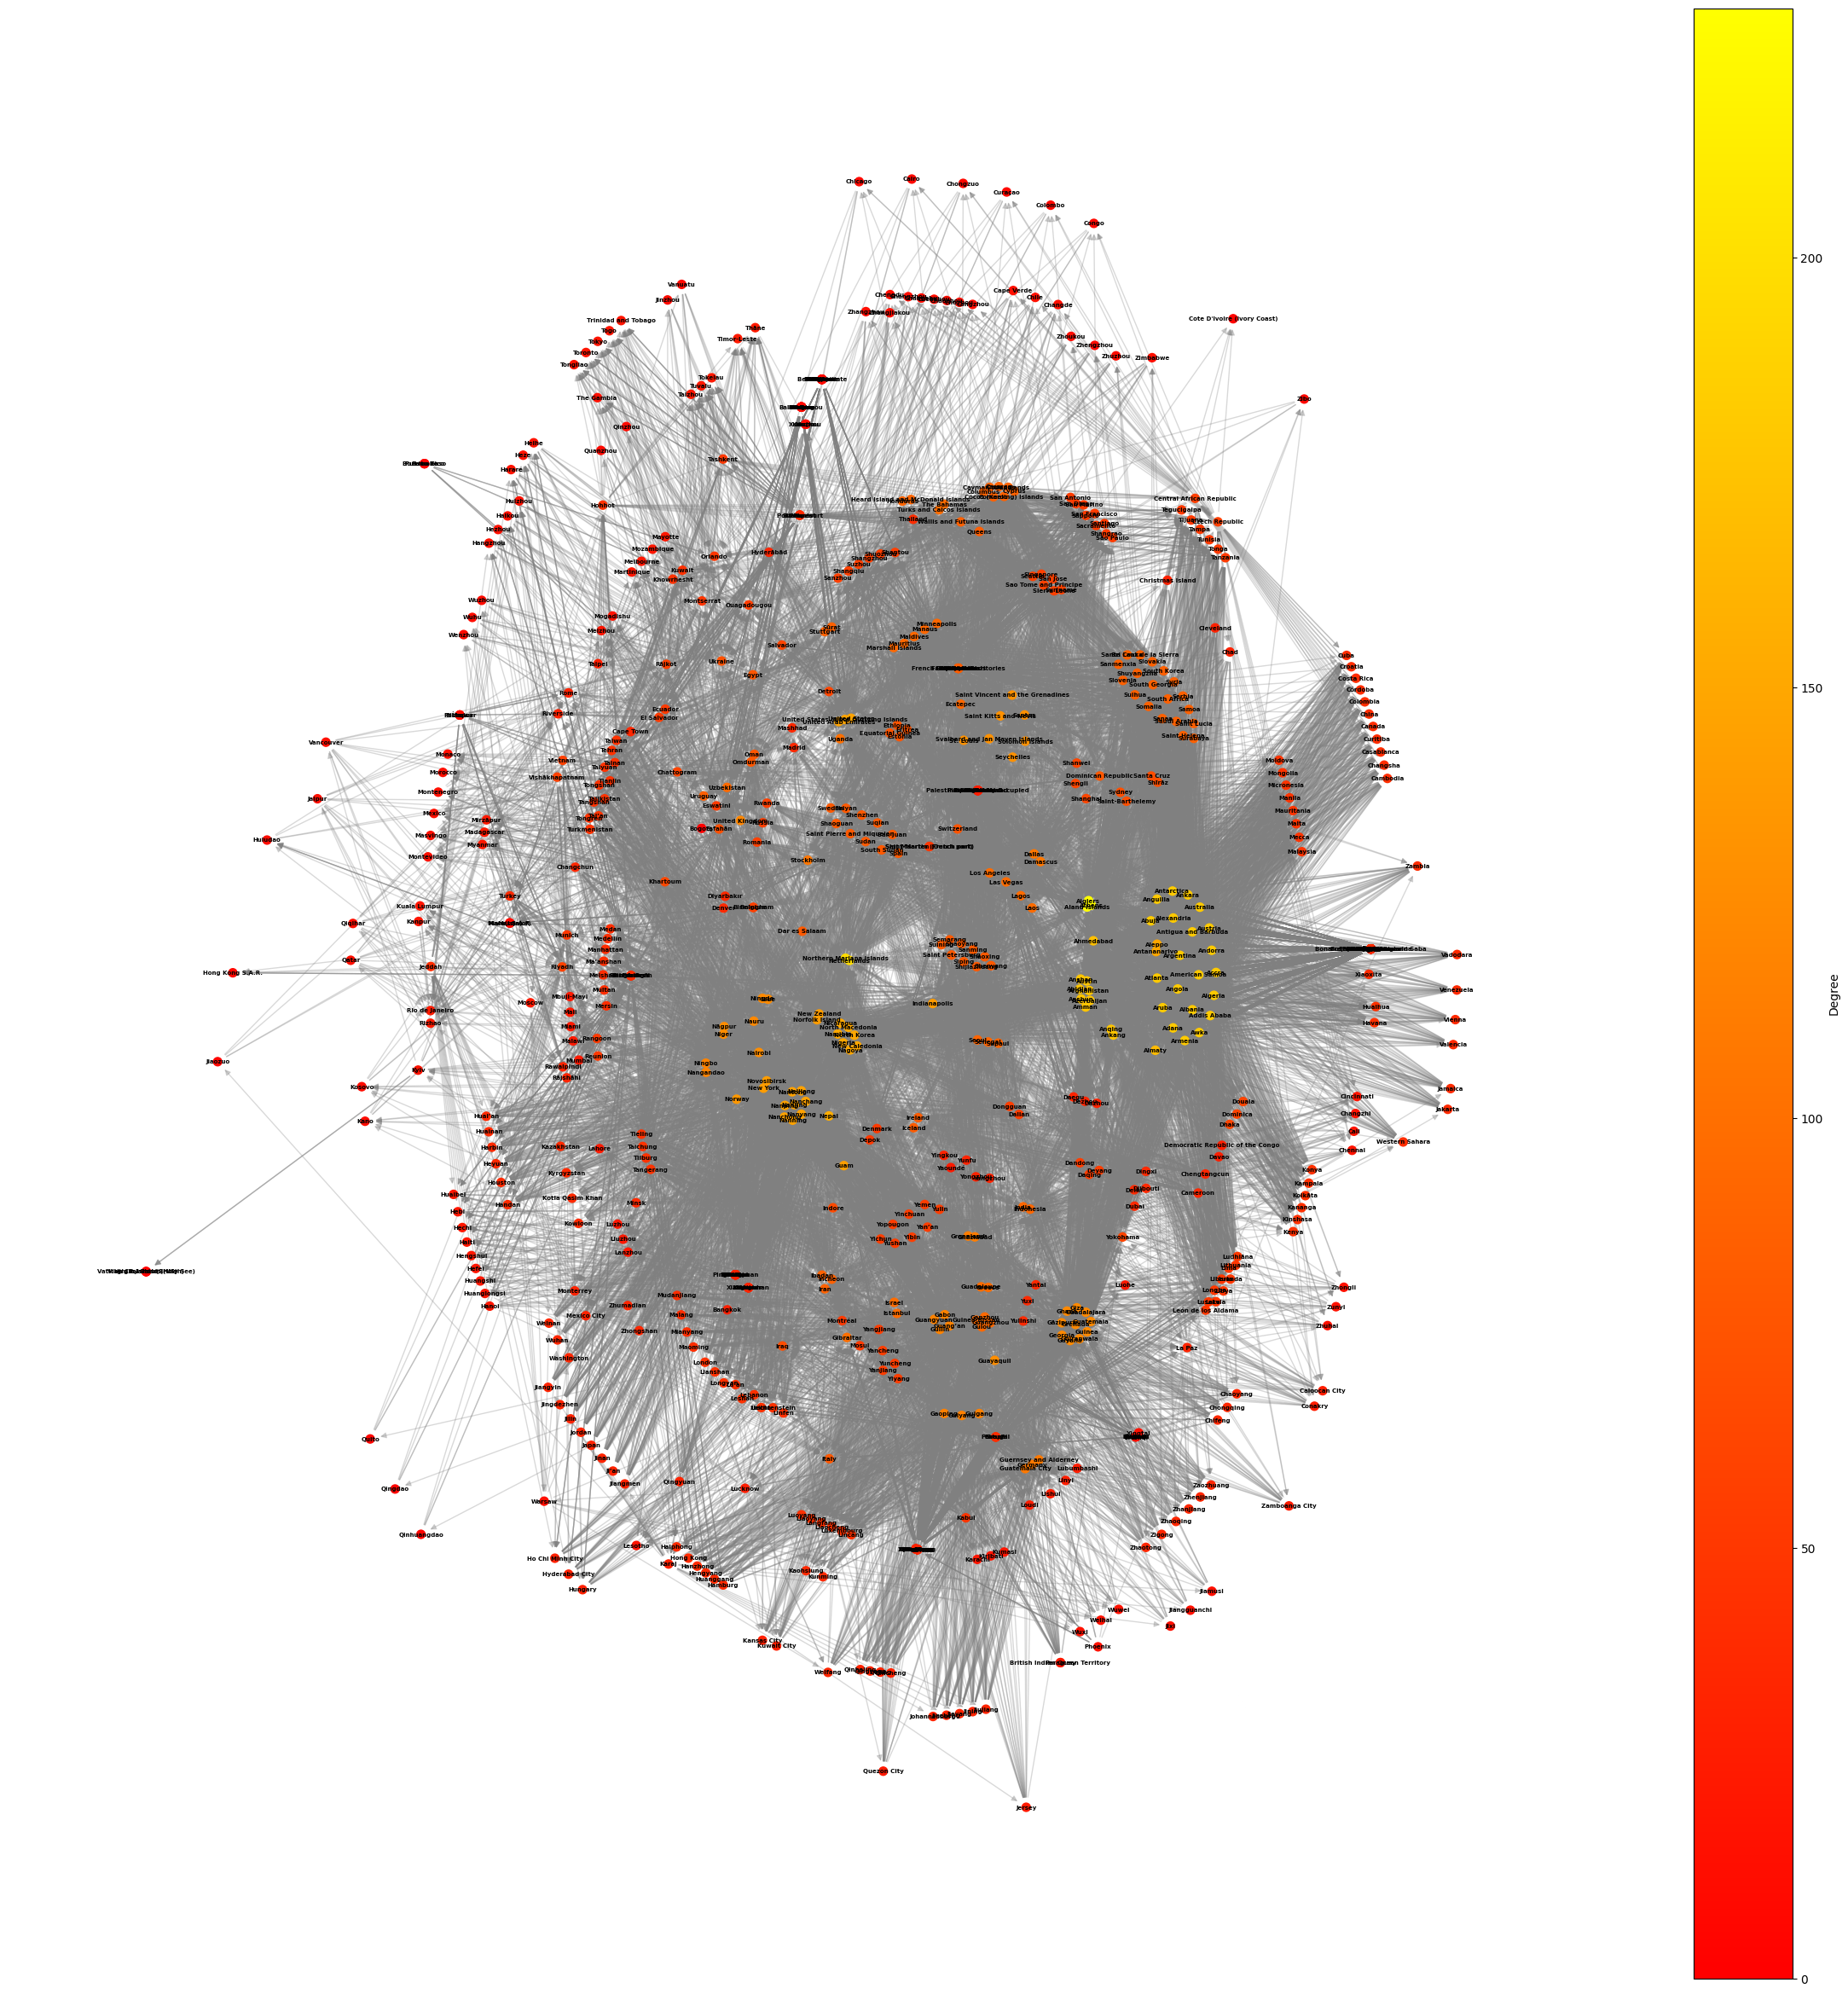

In [52]:
plotGraph(G3)